In [81]:
import holoviews as hv
from bokeh.models import HoverTool, Button
import numpy as np
import networkx as nx

def simulate(network, positions, train_locations):
    """
    Simulates the trains on the network
    :param network: Networkx graph, no positions provided
    :param positions: Dictionary with the positions of the nodes, created by get_node_dict()
    :param train_locations: List of dictionaries with keys 'train_id' and 'location'
    :return:
    """
    #Activate bokeh backend
    hv.extension('bokeh')
    
    #Create a holoviews graph from the networkx graph
    graph = hv.Graph.from_networkx(network, positions).opts(tools=['hover'])
    
    #Define a node position dictionary to use for the trains
    trains = hv.Points(train_locations, kdims=['x', 'y'])

    #Define a hovertool to show the train_id and location
    hover = HoverTool(tooltips=[('train_id', '@train_id'), ('location', '@location')])
    #graph_with_trains = graph * trains

    #Create callable for plot function
    def locations(timestep):
        return hv.Points(train_locations[timestep])

    #Define a button to start the simulation
    #button = Button(label="Start Simulation", button_type="success")

    #Create a dynamic map to update the train locations
    train_dict = {i: locations(i) for i in range(len(train_locations))}
    
    map = hv.HoloMap(train_dict, kdims='Timestep')
    overlay = map * graph
    overlay.opts(width=400, height=600, tools=[hover])
    return overlay

In [82]:
def railway_network_current():
    railway_network = nx.DiGraph()

    # Add nodes - stations
    railway_network.add_node("Rotterdam Centraal", pos=(0, 0), platforms=4, type="station")
    railway_network.add_node("Schiedam Centrum", pos=(0, 4000), platforms=4, type="station")
    railway_network.add_node("Delft Campus", pos=(0, 12500), platforms=2, type="station")
    railway_network.add_node("Delft", pos=(0, 14400), platforms=2, type="station")
    railway_network.add_node("Rijswijk", pos=(0, 18700), platforms=4, type="station")
    railway_network.add_node("Moerwijk", pos=(0, 20600), platforms=4, type="station")
    railway_network.add_node("Den Haag HS", pos=(0, 22600), platforms=4, type="station")

    # Add nodes - switches
    railway_network.add_node("Switch 1", pos=(0, 2100), type="switch")
    railway_network.add_node("Switch 2", pos=(0, 4500), type="switch")
    railway_network.add_node("Switch 3", pos=(0, 11000), type="switch")
    railway_network.add_node("Switch 4", pos=(0, 12800), type="switch")
    railway_network.add_node("Switch 5", pos=(0, 16900), type="switch")
    railway_network.add_node("Switch 6", pos=(0, 21200), type="switch")

    # Add invisible nodes - platforms
    railway_network.add_node("Rotterdam Centraal 1", pos=(15, 0), type="platform")
    railway_network.add_node("Rotterdam Centraal 2", pos=(5, 0), type="platform")
    railway_network.add_node("Rotterdam Centraal 3", pos=(-5, 0), type="platform")
    railway_network.add_node("Rotterdam Centraal 4", pos=(-15, 0), type="platform")

    railway_network.add_node("Schiedam Centrum 1", pos=(15, 4000), type="platform")
    railway_network.add_node("Schiedam Centrum 2", pos=(5, 4000), type="platform")
    railway_network.add_node("Schiedam Centrum 3", pos=(-5, 4000), type="platform")
    railway_network.add_node("Schiedam Centrum 4", pos=(-15, 4000), type="platform")

    railway_network.add_node("Delft Campus 1", pos=(5, 12500), type="platform")
    railway_network.add_node("Delft Campus 3", pos=(-5, 12500), type="platform")

    railway_network.add_node("Delft 1", pos=(5, 14400), type="platform")
    railway_network.add_node("Delft 3", pos=(-5, 14400), type="platform")

    railway_network.add_node("Rijswijk 1", pos=(15, 18700), type="platform")
    railway_network.add_node("Rijswijk 2", pos=(5, 18700), type="platform")
    railway_network.add_node("Rijswijk 3", pos=(-5, 18700), type="platform")
    railway_network.add_node("Rijswijk 4", pos=(-15, 18700), type="platform")

    railway_network.add_node("Moerwijk 1", pos=(15, 20600), type="platform")
    railway_network.add_node("Moerwijk 2", pos=(5, 20600), type="platform")
    railway_network.add_node("Moerwijk 3", pos=(-5, 20600), type="platform")
    railway_network.add_node("Moerwijk 4", pos=(-15, 20600), type="platform")

    railway_network.add_node("Den Haag HS 1", pos=(15, 22600), type="platform")
    railway_network.add_node("Den Haag HS 2", pos=(5, 22600), type="platform")
    railway_network.add_node("Den Haag HS 3", pos=(-5, 22600), type="platform")
    railway_network.add_node("Den Haag HS 4", pos=(-15, 22600), type="platform")

    # Add invisible nodes - switches
    railway_network.add_node("Switch 1 1", pos=(15, 2100), type="vswitch")
    railway_network.add_node("Switch 1 2", pos=(5, 2100), type="vswitch")
    railway_network.add_node("Switch 1 3", pos=(-5, 2100), type="vswitch")
    railway_network.add_node("Switch 1 4", pos=(-15, 2100), type="vswitch")

    railway_network.add_node("Switch 2 1", pos=(15, 4500), type="vswitch")
    railway_network.add_node("Switch 2 2", pos=(5, 4500), type="vswitch")
    railway_network.add_node("Switch 2 3", pos=(-5, 4500), type="vswitch")
    railway_network.add_node("Switch 2 4", pos=(-15, 4500), type="vswitch")

    railway_network.add_node("Switch 3 1", pos=(5, 11000), type="vswitch")
    railway_network.add_node("Switch 3 3", pos=(-5, 11000), type="vswitch")

    railway_network.add_node("Switch 4 1", pos=(5, 12800), type="vswitch")
    railway_network.add_node("Switch 4 3", pos=(-5, 12800), type="vswitch")

    railway_network.add_node("Switch 5 1", pos=(15, 16900), type="vswitch")
    railway_network.add_node("Switch 5 2", pos=(5, 16900), type="vswitch")
    railway_network.add_node("Switch 5 3", pos=(-5, 16900), type="vswitch")
    railway_network.add_node("Switch 5 4", pos=(-15, 16900), type="vswitch")

    railway_network.add_node("Switch 6 1", pos=(15, 21200), type="vswitch")
    railway_network.add_node("Switch 6 2", pos=(5, 21200), type="vswitch")
    railway_network.add_node("Switch 6 3", pos=(-5, 21200), type="vswitch")
    railway_network.add_node("Switch 6 4", pos=(-15, 21200), type="vswitch")


    # Add edges - Rotterdam to HS
    railway_network.add_edge("Rotterdam Centraal 1", "Switch 1 1", length=2100, type="track1")
    railway_network.add_edge("Rotterdam Centraal 2", "Switch 1 2", length=2100, type="track2")
    railway_network.add_edge("Switch 1 1", "Schiedam Centrum 1", length=1900, type="track1")
    railway_network.add_edge("Switch 1 2", "Schiedam Centrum 2", length=1900, type="track2")
    railway_network.add_edge("Schiedam Centrum 1", "Switch 2 1", length=400, type="track1")
    railway_network.add_edge("Schiedam Centrum 2", "Switch 2 2", length=400, type="track2")
    #railway_network.add_edge("Switch 2 1", "Switch 2 2", length=10, type="track1")
    railway_network.add_edge("Switch 2 2", "Switch 3 1", length=6500, type="track1")
    railway_network.add_edge("Switch 3 1", "Delft Campus 1", length=1500, type="track1")
    railway_network.add_edge("Delft Campus 1", "Switch 4 1", length=300, type="track1")
    railway_network.add_edge("Switch 4 1", "Delft 1", length=1600, type="track1")
    railway_network.add_edge("Delft 1", "Switch 5 2", length=2500, type="track1")
    railway_network.add_edge("Switch 5 1", "Rijswijk 1", length=1800, type="track1")
    railway_network.add_edge("Switch 5 2", "Rijswijk 2", length=1800, type="track2")
    railway_network.add_edge("Rijswijk 1", "Moerwijk 1", length=1900, type="track1")
    railway_network.add_edge("Rijswijk 2", "Moerwijk 2", length=1900, type="track2")
    railway_network.add_edge("Moerwijk 1", "Switch 6 1", length=600, type="track1")
    railway_network.add_edge("Moerwijk 2", "Switch 6 2", length=600, type="track2")
    railway_network.add_edge("Switch 6 1", "Den Haag HS 1", length=1400, type="track1")
    railway_network.add_edge("Switch 6 2", "Den Haag HS 2", length=1400, type="track2")

    # Add edges - HS to Rotterdam
    railway_network.add_edge("Switch 1 3", "Rotterdam Centraal 3", length=2100, type="track3")
    railway_network.add_edge("Switch 1 4", "Rotterdam Centraal 4", length=2100, type="track4")
    railway_network.add_edge("Schiedam Centrum 3", "Switch 1 3", length=1900, type="track3")
    railway_network.add_edge("Schiedam Centrum 4", "Switch 1 4", length=1900, type="track4")
    railway_network.add_edge("Switch 2 3", "Schiedam Centrum 3", length=400, type="track3")
    railway_network.add_edge("Switch 2 4", "Schiedam Centrum 4", length=400, type="track4")
    railway_network.add_edge("Switch 3 3", "Switch 2 3", length=6500, type="track3")
    railway_network.add_edge("Delft Campus 3", "Switch 3 3", length=1500, type="track3")
    railway_network.add_edge("Switch 4 3", "Delft Campus 3", length=300, type="track3")
    railway_network.add_edge("Delft 3", "Switch 4 3", length=1600, type="track3")
    railway_network.add_edge("Switch 5 3", "Delft 3", length=2500, type="track3")
    railway_network.add_edge("Rijswijk 3", "Switch 5 3", length=1800, type="track3")
    railway_network.add_edge("Rijswijk 4", "Switch 5 4", length=1800, type="track4")
    railway_network.add_edge("Moerwijk 3", "Rijswijk 3", length=1900, type="track3")
    railway_network.add_edge("Moerwijk 4", "Rijswijk 4", length=1900, type="track4")
    railway_network.add_edge("Switch 6 3", "Moerwijk 3", length=600, type="track3")
    railway_network.add_edge("Switch 6 4", "Moerwijk 4", length=600, type="track4")
    railway_network.add_edge("Den Haag HS 3", "Switch 6 3", length=1400, type="track3")
    railway_network.add_edge("Den Haag HS 4", "Switch 6 4", length=1400, type="track4")

    return railway_network

In [83]:
def railway_network_current_holo():
    railway_network = nx.DiGraph()

    # Add nodes - stations
    railway_network.add_node("Rotterdam Centraal", platforms=4, type="station")
    railway_network.add_node("Schiedam Centrum", platforms=4, type="station")
    railway_network.add_node("Delft Campus", platforms=2, type="station")
    railway_network.add_node("Delft", platforms=2, type="station")
    railway_network.add_node("Rijswijk", platforms=4, type="station")
    railway_network.add_node("Moerwijk", platforms=4, type="station")
    railway_network.add_node("Den Haag HS", platforms=4, type="station")

    # Add nodes - switches
    railway_network.add_node("Switch 1", type="switch")
    railway_network.add_node("Switch 2", type="switch")
    railway_network.add_node("Switch 3", type="switch")
    railway_network.add_node("Switch 4", type="switch")
    railway_network.add_node("Switch 5", type="switch")
    railway_network.add_node("Switch 6", type="switch")

    # Add invisible nodes - platforms
    railway_network.add_node("Rotterdam Centraal 1", type="platform")
    railway_network.add_node("Rotterdam Centraal 2", type="platform")
    railway_network.add_node("Rotterdam Centraal 3", type="platform")
    railway_network.add_node("Rotterdam Centraal 4", type="platform")

    railway_network.add_node("Schiedam Centrum 1", type="platform")
    railway_network.add_node("Schiedam Centrum 2", type="platform")
    railway_network.add_node("Schiedam Centrum 3", type="platform")
    railway_network.add_node("Schiedam Centrum 4", type="platform")

    railway_network.add_node("Delft Campus 1", type="platform")
    railway_network.add_node("Delft Campus 3", type="platform")

    railway_network.add_node("Delft 1", type="platform")
    railway_network.add_node("Delft 3", type="platform")

    railway_network.add_node("Rijswijk 1", type="platform")
    railway_network.add_node("Rijswijk 2", type="platform")
    railway_network.add_node("Rijswijk 3", type="platform")
    railway_network.add_node("Rijswijk 4", type="platform")

    railway_network.add_node("Moerwijk 1", type="platform")
    railway_network.add_node("Moerwijk 2", type="platform")
    railway_network.add_node("Moerwijk 3", type="platform")
    railway_network.add_node("Moerwijk 4", type="platform")

    railway_network.add_node("Den Haag HS 1", type="platform")
    railway_network.add_node("Den Haag HS 2", type="platform")
    railway_network.add_node("Den Haag HS 3", type="platform")
    railway_network.add_node("Den Haag HS 4", type="platform")

    # Add invisible nodes - switches
    railway_network.add_node("Switch 1 1", type="vswitch")
    railway_network.add_node("Switch 1 2", type="vswitch")
    railway_network.add_node("Switch 1 3", type="vswitch")
    railway_network.add_node("Switch 1 4", type="vswitch")

    railway_network.add_node("Switch 2 1", type="vswitch")
    railway_network.add_node("Switch 2 2", type="vswitch")
    railway_network.add_node("Switch 2 3", type="vswitch")
    railway_network.add_node("Switch 2 4", type="vswitch")

    railway_network.add_node("Switch 3 1", type="vswitch")
    railway_network.add_node("Switch 3 3", type="vswitch")

    railway_network.add_node("Switch 4 1", type="vswitch")
    railway_network.add_node("Switch 4 3", type="vswitch")

    railway_network.add_node("Switch 5 1", type="vswitch")
    railway_network.add_node("Switch 5 2", type="vswitch")
    railway_network.add_node("Switch 5 3", type="vswitch")
    railway_network.add_node("Switch 5 4", type="vswitch")

    railway_network.add_node("Switch 6 1", type="vswitch")
    railway_network.add_node("Switch 6 2", type="vswitch")
    railway_network.add_node("Switch 6 3", type="vswitch")
    railway_network.add_node("Switch 6 4", type="vswitch")

    # Add edges - Rotterdam to HS
    railway_network.add_edge("Rotterdam Centraal 1", "Switch 1 1", length=2100, type="track1")
    railway_network.add_edge("Rotterdam Centraal 2", "Switch 1 2", length=2100, type="track2")
    railway_network.add_edge("Switch 1 1", "Schiedam Centrum 1", length=1900, type="track1")
    railway_network.add_edge("Switch 1 2", "Schiedam Centrum 2", length=1900, type="track2")
    railway_network.add_edge("Schiedam Centrum 1", "Switch 2 1", length=400, type="track1")
    railway_network.add_edge("Schiedam Centrum 2", "Switch 2 2", length=400, type="track2")
    # railway_network.add_edge("Switch 2 1", "Switch 2 2", length=10, type="track1")
    railway_network.add_edge("Switch 2 2", "Switch 3 1", length=6500, type="track1")
    railway_network.add_edge("Switch 3 1", "Delft Campus 1", length=1500, type="track1")
    railway_network.add_edge("Delft Campus 1", "Switch 4 1", length=300, type="track1")
    railway_network.add_edge("Switch 4 1", "Delft 1", length=1600, type="track1")
    railway_network.add_edge("Delft 1", "Switch 5 2", length=2500, type="track1")
    railway_network.add_edge("Switch 5 1", "Rijswijk 1", length=1800, type="track1")
    railway_network.add_edge("Switch 5 2", "Rijswijk 2", length=1800, type="track2")
    railway_network.add_edge("Rijswijk 1", "Moerwijk 1", length=1900, type="track1")
    railway_network.add_edge("Rijswijk 2", "Moerwijk 2", length=1900, type="track2")
    railway_network.add_edge("Moerwijk 1", "Switch 6 1", length=600, type="track1")
    railway_network.add_edge("Moerwijk 2", "Switch 6 2", length=600, type="track2")
    railway_network.add_edge("Switch 6 1", "Den Haag HS 1", length=1400, type="track1")
    railway_network.add_edge("Switch 6 2", "Den Haag HS 2", length=1400, type="track2")

    # Add edges - HS to Rotterdam
    railway_network.add_edge("Switch 1 3", "Rotterdam Centraal 3", length=2100, type="track3")
    railway_network.add_edge("Switch 1 4", "Rotterdam Centraal 4", length=2100, type="track4")
    railway_network.add_edge("Schiedam Centrum 3", "Switch 1 3", length=1900, type="track3")
    railway_network.add_edge("Schiedam Centrum 4", "Switch 1 4", length=1900, type="track4")
    railway_network.add_edge("Switch 2 3", "Schiedam Centrum 3", length=400, type="track3")
    railway_network.add_edge("Switch 2 4", "Schiedam Centrum 4", length=400, type="track4")
    railway_network.add_edge("Switch 3 3", "Switch 2 3", length=6500, type="track3")
    railway_network.add_edge("Delft Campus 3", "Switch 3 3", length=1500, type="track3")
    railway_network.add_edge("Switch 4 3", "Delft Campus 3", length=300, type="track3")
    railway_network.add_edge("Delft 3", "Switch 4 3", length=1600, type="track3")
    railway_network.add_edge("Switch 5 3", "Delft 3", length=2500, type="track3")
    railway_network.add_edge("Rijswijk 3", "Switch 5 3", length=1800, type="track3")
    railway_network.add_edge("Rijswijk 4", "Switch 5 4", length=1800, type="track4")
    railway_network.add_edge("Moerwijk 3", "Rijswijk 3", length=1900, type="track3")
    railway_network.add_edge("Moerwijk 4", "Rijswijk 4", length=1900, type="track4")
    railway_network.add_edge("Switch 6 3", "Moerwijk 3", length=600, type="track3")
    railway_network.add_edge("Switch 6 4", "Moerwijk 4", length=600, type="track4")
    railway_network.add_edge("Den Haag HS 3", "Switch 6 3", length=1400, type="track3")
    railway_network.add_edge("Den Haag HS 4", "Switch 6 4", length=1400, type="track4")

    return railway_network

In [84]:
def get_node_dict(network):
    """
    Returns a dictionary with the nodes and their coordinates
    :param network: networkx graph
    :return: dictionary with nodes and coordinates
    """
    node_dict = {}
    for (i, node) in enumerate(network.nodes):
        node_dict[node] = network.nodes[node]['pos']
        
    return node_dict

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
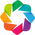

In [94]:
railway_network_holo = railway_network_current_holo()
railway_network = railway_network_current()
positions = get_node_dict(railway_network)

train_locations = [[(-15, 0), (-15, 0), (-15, 0)], [(-15, 300), (-15, 0), (-15, 0)], [(-15, 600), (-15, 0), (-15, 0)], [(-15, 900), (-15, 0), (-15, 0)], [(-15, 1200), (-15, 0), (-15, 0)], [(-15, 1500), (-15, 300), (-15, 0)], [(-15, 1800), (-15, 600), (-15, 0)], [(-15, 2100), (-15, 900), (-15, 0)], [(-15, 1200), (-15, 0), (-5, 2400)], [(-15, 1500), (-15, 300), (-5, 2700)], [(-15, 1800), (-15, 600), (-5, 3000)], [(-15, 2100), (-15, 900), (-5, 3300)], [(-15, 1200), (-5, 3600), (-5, 2400)], [(-15, 1500), (-5, 3900), (-5, 2700)], [(-15, 1800), (-5, 4200), (-5, 3000)], [(-15, 2100), (-5, 4500), (-5, 3300)], [(-15, 4800), (-5, 3600), (-5, 2400)], [(-15, 5100), (-5, 3900), (-5, 2700)], [(-15, 5400), (-5, 4200), (-5, 3000)], [(-15, 5700), (-5, 4500), (-5, 3300)], [(-15, 6000), (-15, 4800), (-5, 3600)], [(-15, 6300), (-15, 5100), (-5, 3900)], [(-15, 6600), (-15, 5400), (-5, 4200)], [(-15, 6900), (-15, 5700), (-5, 4500)], [(-15, 7200), (-15, 6000), (-5, 4500)], [(-15, 7500), (-15, 6300), (-5, 5100)], [(-15, 7800), (-15, 6600), (-5, 5400)], [(-15, 8100), (-15, 6900), (-5, 5700)], [(-15, 8400), (-15, 7200), (-5, 6000)], [(-15, 8700), (-15, 7500), (-5, 6300)], [(-15, 9000), (-15, 7800), (-5, 6600)], [(-15, 9300), (-15, 8100), (-5, 6900)], [(-15, 9600), (-15, 8400), (-5, 7200)], [(-15, 9900), (-15, 8700), (-5, 7500)], [(-15, 10200), (-15, 9000), (-5, 7800)], [(-15, 10500), (-15, 9300), (-5, 8100)], [(-15, 10800), (-15, 9600), (-5, 8400)], [(-15, 9900), (-5, 8700), (-5, 11100)], [(-15, 10200), (-5, 9000), (-5, 11400)], [(-15, 10500), (-5, 9300), (-5, 11700)], [(-15, 10800), (-5, 9600), (-5, 12000)], [(-15, 10800), (-5, 9900), (-5, 12300)], [(-15, 11400), (-5, 10200), (-5, 12600)], [(-15, 11700), (-15, 12900), (-5, 10500)], [(-15, 12000), (-15, 13200), (-5, 10800)], [(-15, 12300), (-15, 13500), (-5, 10800)], [(-15, 12600), (-15, 13800), (-5, 11400)], [(-15, 14100), (-5, 11700), (-5, 12900)], [(-15, 14400), (-5, 12000), (-5, 13200)], [(-15, 14400), (-5, 12300), (-5, 13500)], [(-15, 14700), (-5, 12600), (-5, 13800)], [(-15, 15000), (-15, 12900), (-5, 14100)], [(-15, 15300), (-15, 13200), (-5, 14400)], [(-15, 15600), (-15, 13500), (-5, 14400)], [(-15, 15900), (-15, 13800), (-5, 14700)], [(-15, 16200), (-15, 14100), (-5, 15000)], [(-15, 16500), (-15, 14400), (-5, 15300)], [(-15, 16800), (-15, 14400), (-5, 15600)], [(-15, 14700), (-5, 15900), (-5, 17100)], [(-15, 15000), (-5, 16200), (-5, 17400)], [(-15, 15300), (-5, 16500), (-5, 17700)], [(-15, 15600), (-5, 16800), (-5, 18000)], [(-15, 15900), (-15, 17100), (-5, 18300)], [(-15, 16200), (-15, 17400), (-5, 18600)], [(-15, 16500), (-15, 17700), (-5, 18900)], [(-15, 16800), (-15, 18000), (-5, 19200)], [(-15, 18300), (-5, 19500), (-5, 17100)], [(-15, 18600), (-5, 19800), (-5, 17400)], [(-15, 18900), (-5, 20100), (-5, 17700)], [(-15, 19200), (-5, 20400), (-5, 18000)], [(-15, 19500), (-5, 20700), (-5, 18300)], [(-15, 19800), (-5, 21000), (-5, 18600)], [(-15, 20100), (-15, 21300), (-5, 18900)], [(-15, 20400), (-15, 21600), (-5, 19200)], [(-15, 20700), (-15, 21900), (-5, 19500)], [(-15, 21000), (-15, 22200), (-5, 19800)], [(-15, 22500), (-5, 20100), (-5, 21300)], [(-5, 20400), (-5, 21600)], [(-5, 20700), (-5, 21900)], [(-5, 21000), (-5, 22200)], [(-15, 21300), (-5, 22500)], [(-15, 21600)], [(-15, 21900)], [(-15, 22200)], [(-15, 22500)]]


# train_locations_2 = [[(5, 200), (5, 10000), (15, 14000), (-5, 8000), (-15, 20000)],
#                          [(5, 220), (5, 10020), (15, 14020), (-5, 8020), (-15, 20020)],
#                          [(5, 240), (5, 10040), (15, 14040), (-5, 8040), (-15, 20040)],
#                          [(5, 260), (5, 10060), (15, 14060), (-5, 8060), (-15, 20060)],
#                          [(5, 280), (5, 10080), (15, 14080), (-5, 8080), (-15, 20080)],
#                          [(5, 300), (5, 10100), (15, 14100), (-5, 8100), (-15, 20100)],
#                          [(5, 320), (5, 10120), (15, 14120), (-5, 8120), (-15, 20120)],
#                          [(5, 340), (5, 10140), (15, 14140), (-5, 8140), (-15, 20140)],
#                          [(5, 360), (5, 10160), (15, 14160), (-5, 8160), (-15, 20160)]]

map = simulate(railway_network_holo, positions, train_locations)


In [95]:
map

:HoloMap   [Timestep]
   :Overlay
      .Points.I :Points   [x,y]
      .Graph.I  :Graph   [start,end]   (length,type)